#### **Load Data**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trans_dt = pd.read_excel("QVI_transaction_data.xlsx")
trans_dt

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [17]:
trans_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


#### **Quick Cleaning**

In [21]:
# date's column is not in datetime format, so we need to convert it
trans_dt['DATE_DateTime'] = pd.to_datetime(trans_dt['DATE'], origin='1900-01-01', unit='D')
trans_dt.drop(columns=['DATE'], inplace=True)
trans_dt.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_DateTime
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20


In [22]:
#check category value that how many unique products are in the data?
print('how many unique products are:',trans_dt['PROD_NAME'].nunique())
trans_dt['PROD_NAME'].value_counts()

how many unique products are: 114


PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

### **EDA & Preprocessing**

In [23]:
categorical_cols = trans_dt.select_dtypes(include='object')
numeric_cols = trans_dt.select_dtypes(include=['int64', 'float64'])

rows = trans_dt.shape[0]
cols = trans_dt.shape[1]

print(f'the dataset contains {rows} rows and {cols} columns.')

#print the summary statistics for categorical column
print("\nSummary statistics for categorical column:")
display(categorical_cols.describe())

#print the summary statistics for numeric column
print("\nSummary statistics for numeric column:")
display(numeric_cols.describe())

the dataset contains 264836 rows and 8 columns.

Summary statistics for categorical column:


,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304



Summary statistics for numeric column:


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


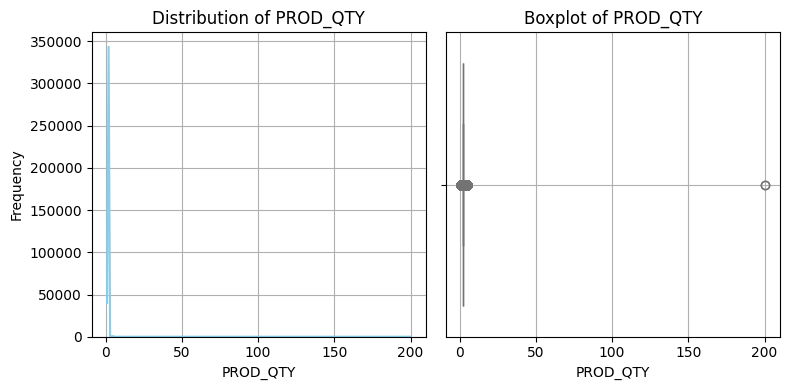

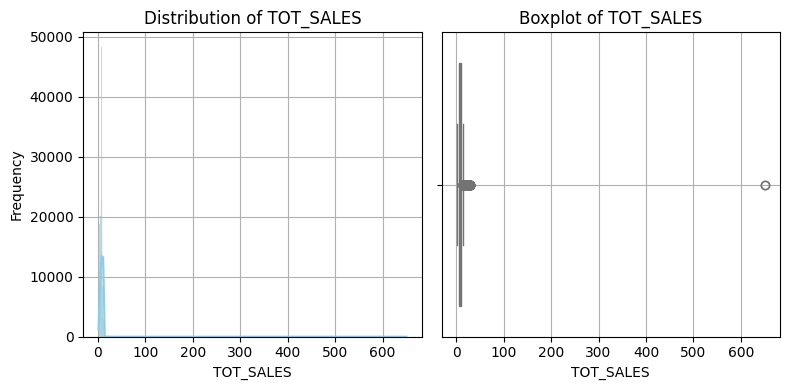

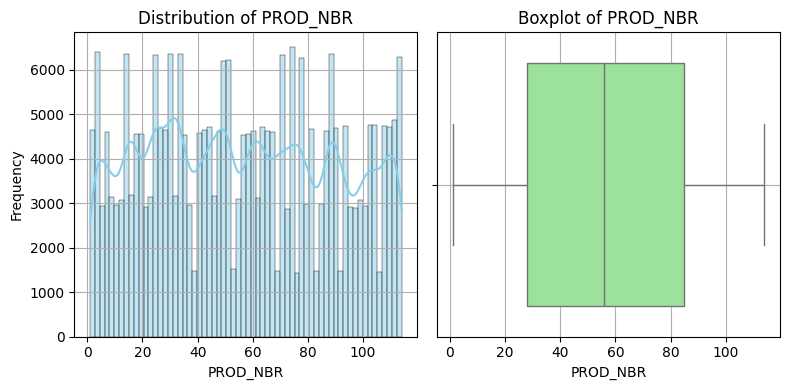

In [46]:
# Visualize the distribution of numeric features to identify outliers

numeric_feats = ['PROD_QTY', 'TOT_SALES', 'PROD_NBR']
for numeric in numeric_feats:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x = trans_dt[numeric], kde=True, color='skyblue')
    plt.title(f"Distribution of {numeric}")
    plt.xlabel(numeric)
    plt.ylabel("Frequency")
    plt.grid()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = trans_dt[numeric], color='lightgreen')
    plt.title(f"Boxplot of {numeric}")
    plt.xlabel(numeric)
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
#  from the above visualization we can see that PROD_QTY has some outliers, let's check the count of each value product
trans_dt['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [ ]:
# Let's check the transaction where Product quantity is 200
trans_dt[trans_dt['PROD_QTY'] == 200]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_DateTime
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-21
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-22


In [ ]:
# from the distribution of TOT_SALES, we can see that there are some high sales. Let's check the top 5 highest sales
trans_dt.TOT_SALES.sort_values(ascending=False).head(5)

69762     650.0
69763     650.0
150683     29.5
5179       29.5
55558      29.5
Name: TOT_SALES, dtype: float64

In [43]:
# Let's check the transction who has the highes total sales 
trans_dt[trans_dt['TOT_SALES'] ==650.0]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_DateTime
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-21
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-22


In [49]:
# we will delete these outliers from the dataset by filtering the data
outlier_customer = trans_dt[trans_dt['PROD_QTY'] == 200]['LYLTY_CARD_NBR'].unique()

trans_dt = trans_dt[~trans_dt['LYLTY_CARD_NBR'].isin(outlier_customer)]


In [50]:
trans_dt.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,DATE_DateTime
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20


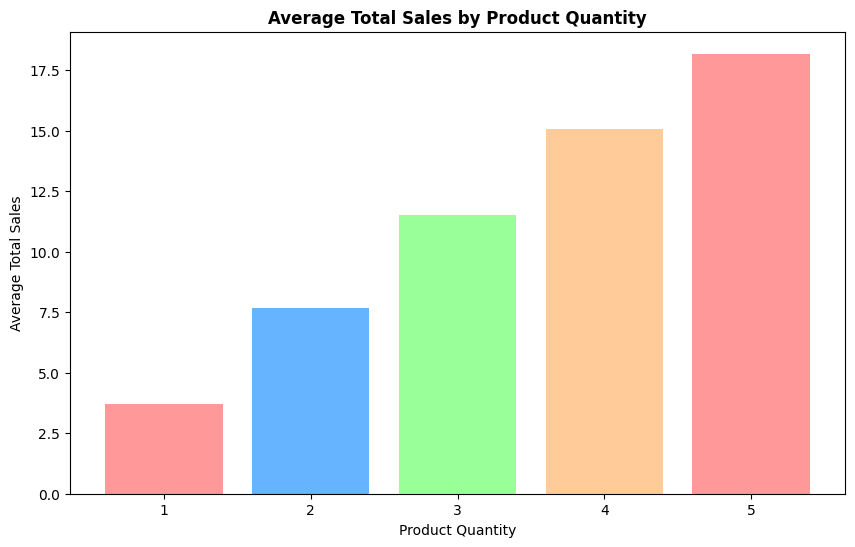

In [55]:
# we want to see the correlation between product quantity and total sales
plt.figure(figsize=(10, 6))
prod_qty_per_tot_sales = trans_dt.groupby('PROD_QTY')['TOT_SALES'].mean()
plt.bar(prod_qty_per_tot_sales.index, prod_qty_per_tot_sales.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Average Total Sales by Product Quantity', fontweight='bold')
plt.xlabel('Product Quantity')
plt.ylabel('Average Total Sales')
plt.show()

### **Final Data**

In [56]:
# save the cleaned data to csv file
trans_dt.to_csv("trans_dt_cleaned.csv", index=False)